In [258]:
#Importing Libraries

In [259]:
import os
import numpy as np
import pandas as pd

# Importing viusalization libraries

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# splitting the data

from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler,StandardScaler,OneHotEncoder

# Importing the models
from sklearn.ensemble import RandomForestRegressor

# Importing the metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [260]:
#Load the Dataset- House Price Prediction dataset

In [261]:
df = pd.read_csv("House Price Prediction dataset.csv")
df.head(4)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA


In [262]:
# Checking the shape of dataset

df.shape

(4600, 18)

In [263]:
# Looking at the datatypes

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [264]:
# Checking for NUll values in the dataset

df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [265]:
# Checking for duplicate values in the data

df.duplicated().sum()

0

In [266]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

In [267]:
del df['street']
del df['city']
del df['country']

In [268]:
df.describe()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [269]:
# Number of unique values in all columns

df.nunique()

date               70
price            1741
bedrooms           10
bathrooms          26
sqft_living       566
sqft_lot         3113
floors              6
waterfront          2
view                5
condition           5
sqft_above        511
sqft_basement     207
yr_built          115
yr_renovated       60
statezip           77
dtype: int64

In [270]:
# Checking the number of unique vlaues in bedrooms

df["bedrooms"].value_counts()

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64

In [271]:
# Checking the number of unique vlaues in bathroom

df["bathrooms"].value_counts()

2.50    1189
1.00     743
1.75     629
2.00     427
2.25     419
1.50     291
2.75     276
3.00     167
3.50     162
3.25     136
3.75      37
4.50      29
4.25      23
4.00      23
0.75      17
4.75       7
5.00       6
5.25       4
5.50       4
1.25       3
6.25       2
0.00       2
8.00       1
5.75       1
6.50       1
6.75       1
Name: bathrooms, dtype: int64

In [272]:
# Checking number of unique values in column Waterfront

df["waterfront"].value_counts()

0    4567
1      33
Name: waterfront, dtype: int64

In [273]:
# Checking for number of unique values in column Floor

df["floors"].unique()

array([1.5, 2. , 1. , 2.5, 3. , 3.5])

In [274]:
# Checking a rating given to number of houses

df["condition"].value_counts()

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

In [275]:
# Checking the number of view a property had

df["view"].value_counts()

0    4140
2     205
3     116
4      70
1      69
Name: view, dtype: int64

In [276]:
#Dropping Variable

In [277]:
d=[]
for value in df["statezip"]:
    d.append(int(value[2:]))
    
df["statezip"]=np.array(d)

In [278]:
df.head(4)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,98133
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,98119
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,98042
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,98008


In [279]:
# Removing unwanted columns

del df["date"]

In [280]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'statezip'],
      dtype='object')

In [281]:
df["price"].value_counts()

0.0          49
300000.0     42
400000.0     31
440000.0     29
450000.0     29
             ..
684680.0      1
609900.0      1
1635000.0     1
1339000.0     1
220600.0      1
Name: price, Length: 1741, dtype: int64

In [282]:
df.drop(np.where(df["price"]==0)[0],axis=0,inplace=True)

In [283]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,statezip
count,4.551000e+03,4551.000000,4551.000000,4551.000000,4.551000e+03,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000,4551.000000
mean,5.579059e+05,3.394639,2.155021,2132.372226,1.483528e+04,1.512195,0.006592,0.234674,3.449352,1822.221710,310.150516,1970.795649,808.564052,98079.397056
std,5.639299e+05,0.904595,0.776351,955.949708,3.596408e+04,0.538531,0.080932,0.765373,0.675160,854.452888,461.987629,29.760073,979.421487,53.048784
min,7.800000e+03,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000
25%,3.262643e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000,98072.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097800e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000,98117.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000,98354.000000


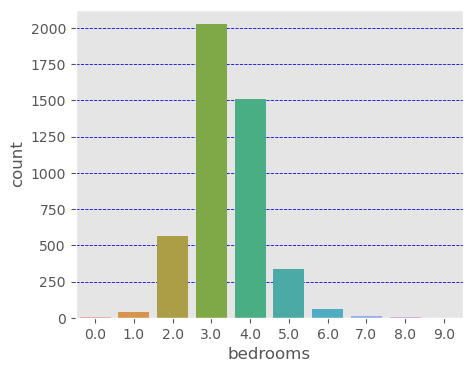

In [284]:
# Univariate analysis
plt.figure(figsize=(5,4))
sns.countplot(data = df,x = "bedrooms")
plt.grid(axis="y",color="blue",linestyle="--",linewidth=0.6)
plt.style.use("ggplot")
plt.show()

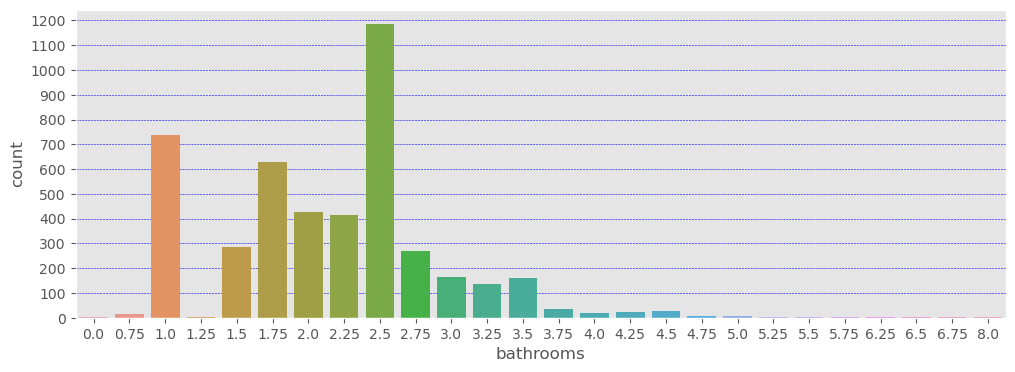

In [285]:
plt.figure(figsize=(12,4))
sns.countplot(data = df,x = "bathrooms")
plt.grid(axis="y",color="blue",linestyle="--",linewidth=0.4)
plt.yticks(range(0,1300,100))
plt.style.use("ggplot")
plt.show()

count    4.551000e+03
mean     5.579059e+05
std      5.639299e+05
min      7.800000e+03
25%      3.262643e+05
50%      4.650000e+05
75%      6.575000e+05
max      2.659000e+07
Name: price, dtype: float64


C:\Users\Monika\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


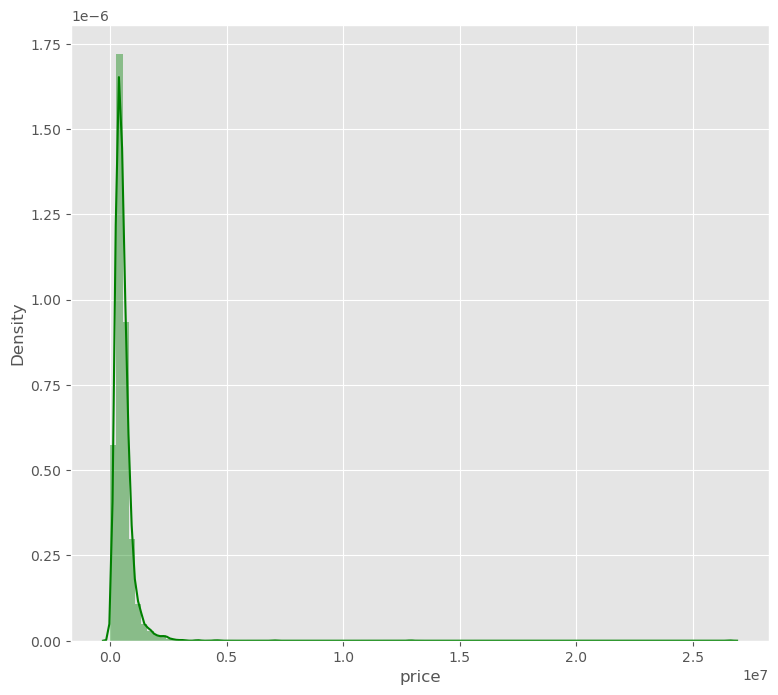

In [286]:
print(df['price'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(df['price'], color='g', bins=100, hist_kws={'alpha': 0.4});

In [287]:
#Numerical data distribution
#We will now take a look at how the numerical features are distributed. In order to do this, let us first list all the types of 

In [288]:
list(set(df.dtypes.tolist()))

[dtype('float64'), dtype('int32'), dtype('int64')]

In [289]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


In [290]:
#Now let us plot the distribution for all the numerical features.

0

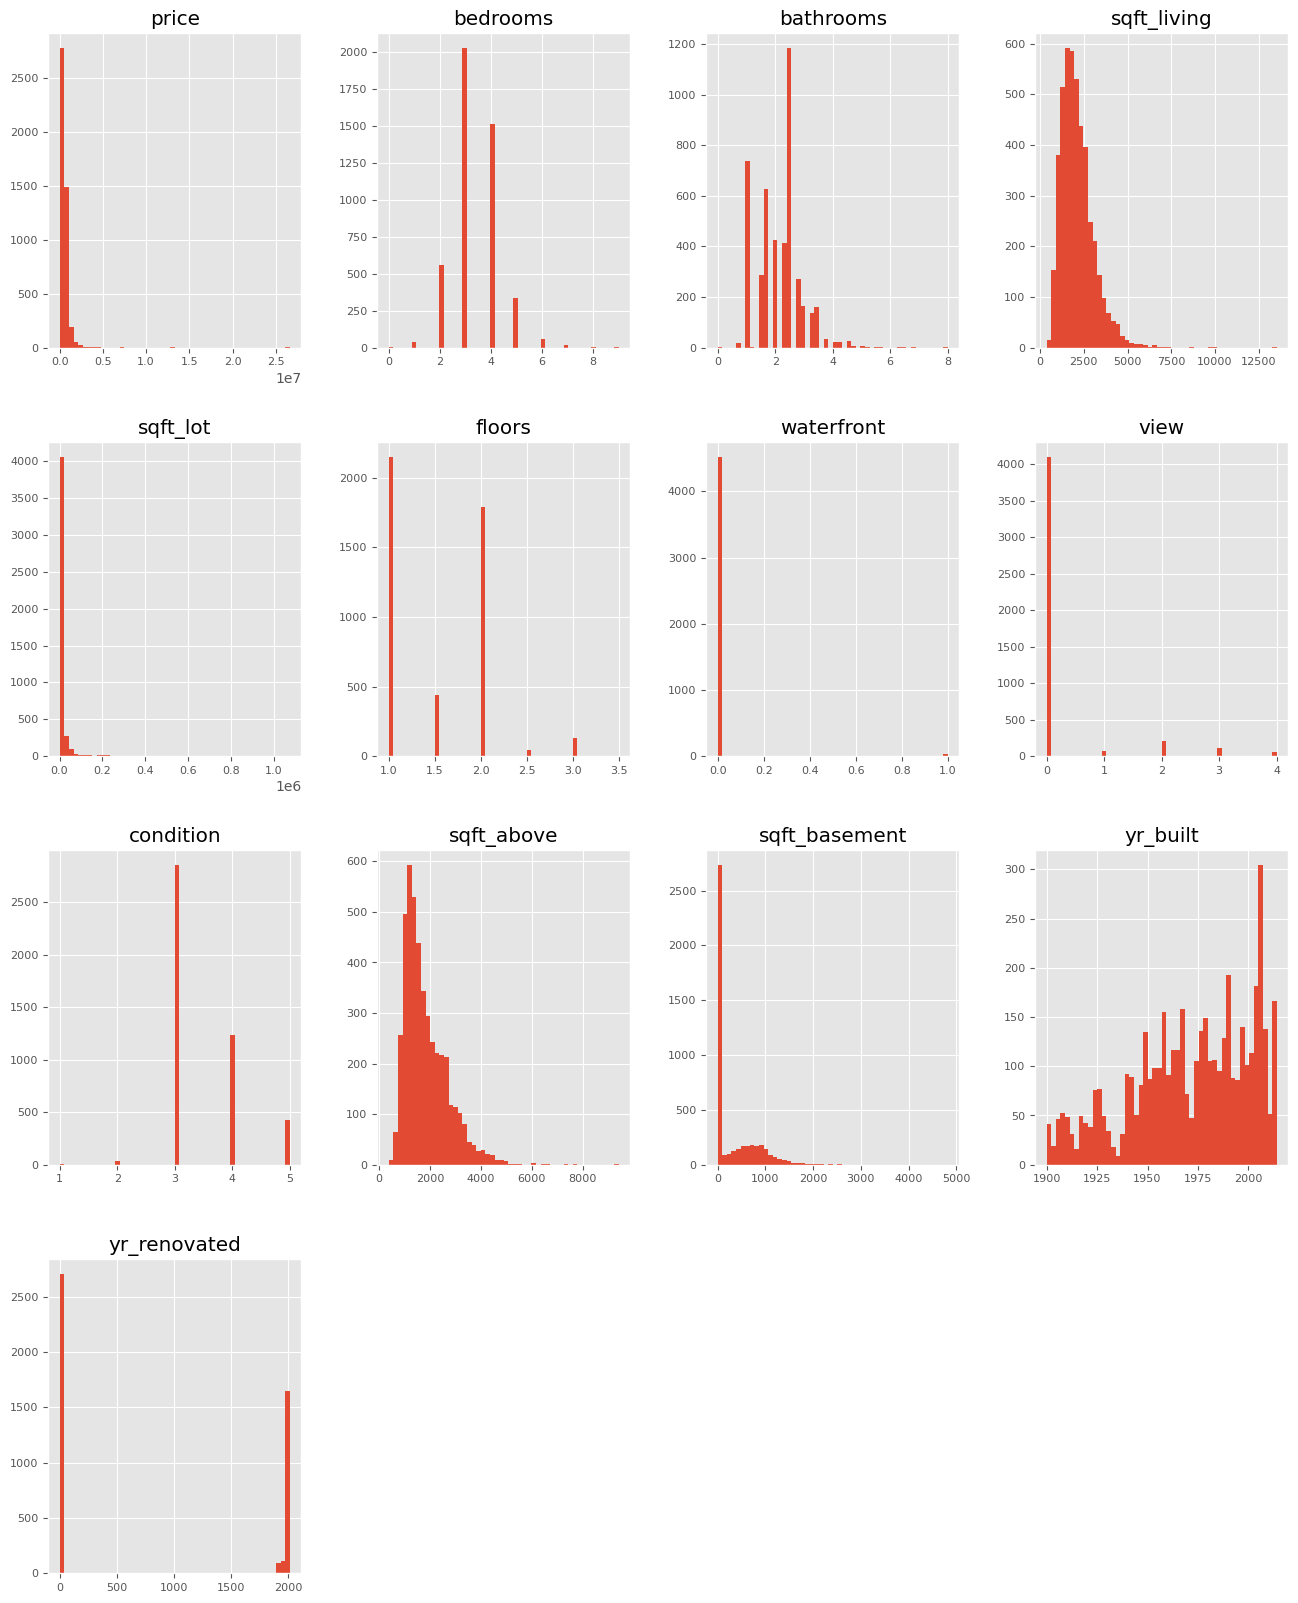

In [291]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);0


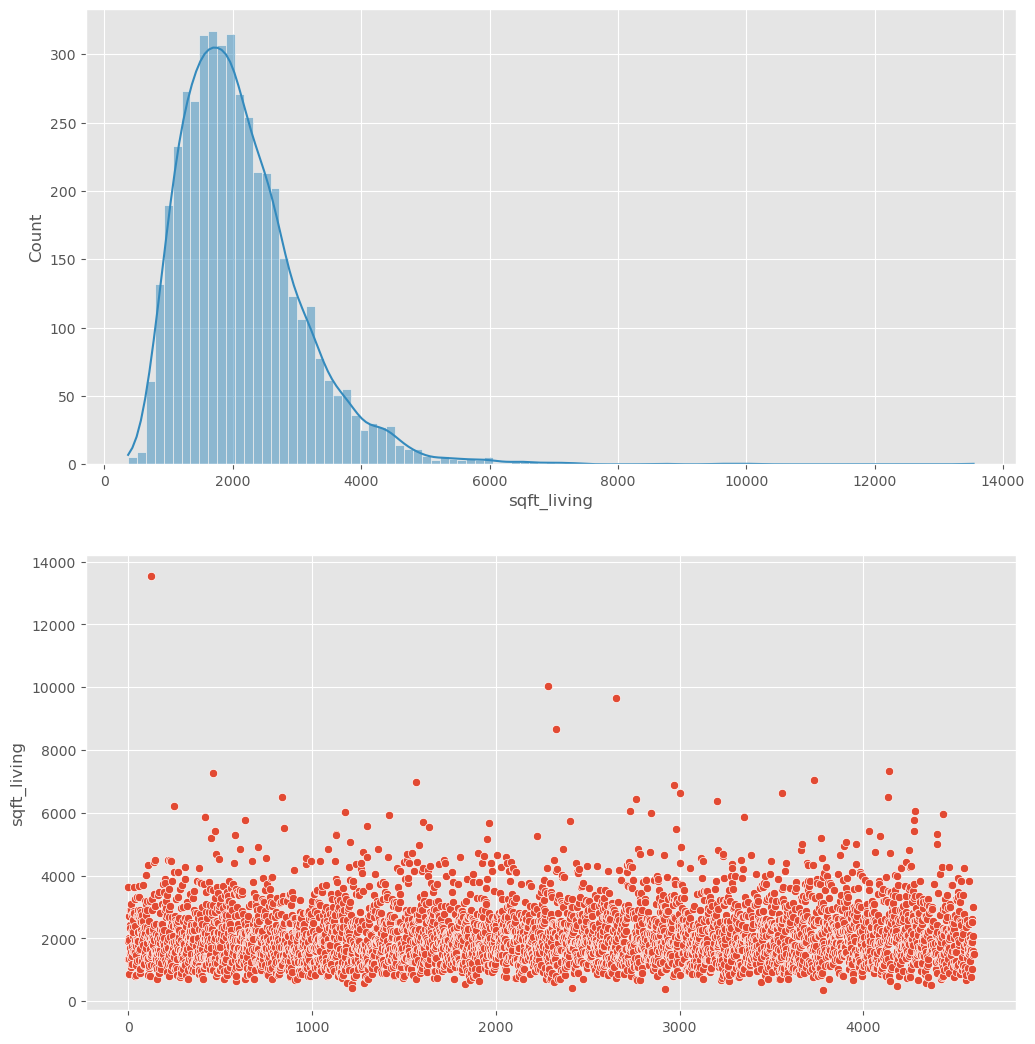

In [292]:
fig,axs = plt.subplots(2,1,figsize=(12,13))
plt.subplot(2,1,1)
sns.histplot(data=df,x="sqft_living",kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.style.use("ggplot")

plt.subplot(2,1,2)
sns.scatterplot(data=df,x=df.index,y="sqft_living")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

In [293]:
print("Before transformation skew : ",df["sqft_basement"].skew())
df["sqft_basement"] = np.cbrt(df["sqft_basement"])
print("After transformation skew : ",df["sqft_basement"].skew())

Before transformation skew :  1.6550756371892148
After transformation skew :  0.5650940779006431


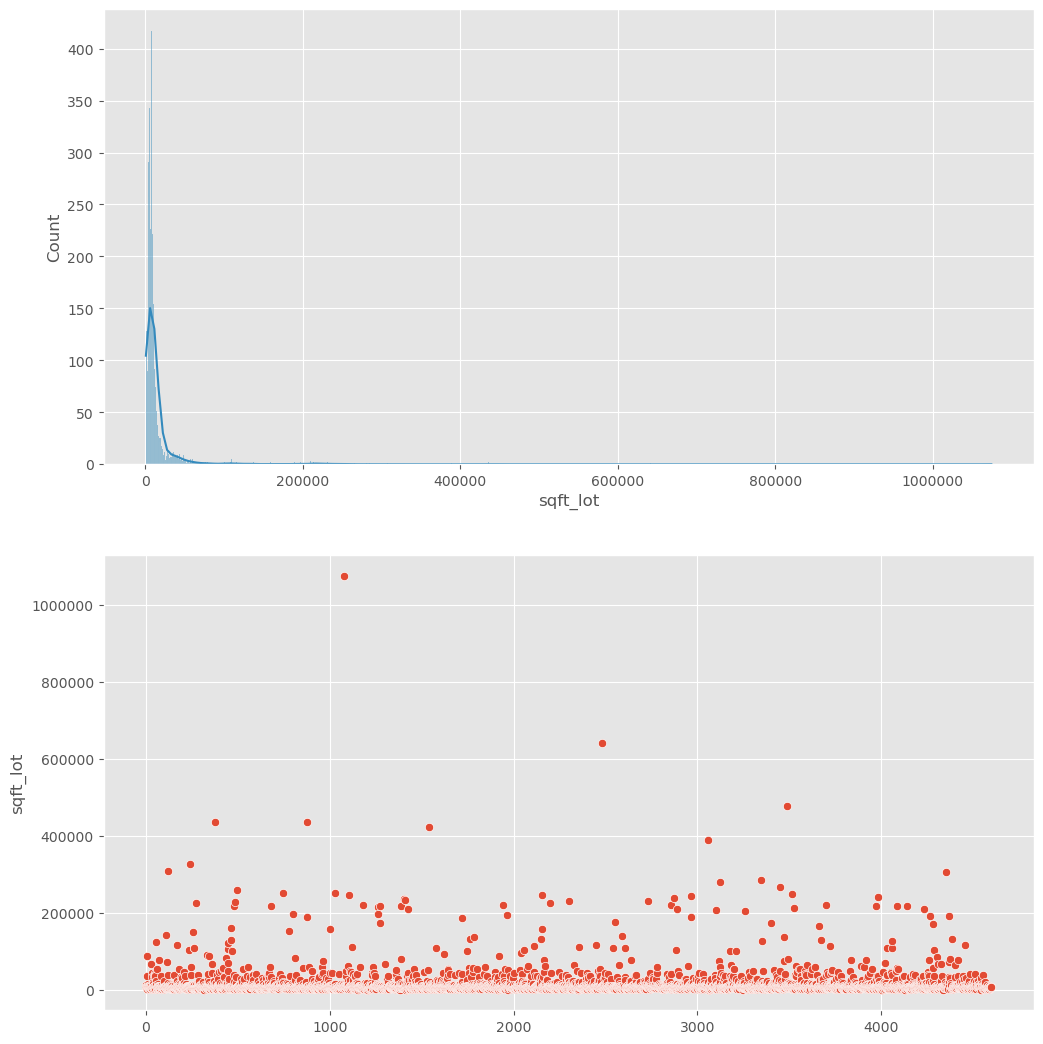

In [294]:
fig,axs = plt.subplots(2,1,figsize=(12,13))
plt.subplot(2,1,1)
sns.histplot(data=df,x="sqft_lot",kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.style.use("ggplot")

plt.subplot(2,1,2)
sns.scatterplot(data=df,x=df.index,y="sqft_lot")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

In [295]:
print("Before transformation skew : ",df["sqft_lot"].skew())
df["sqft_lot"] = np.log(df["sqft_lot"])
print("After transformation skew : ",df["sqft_lot"].skew())

Before transformation skew :  11.329014386009023
After transformation skew :  0.8412624258021195


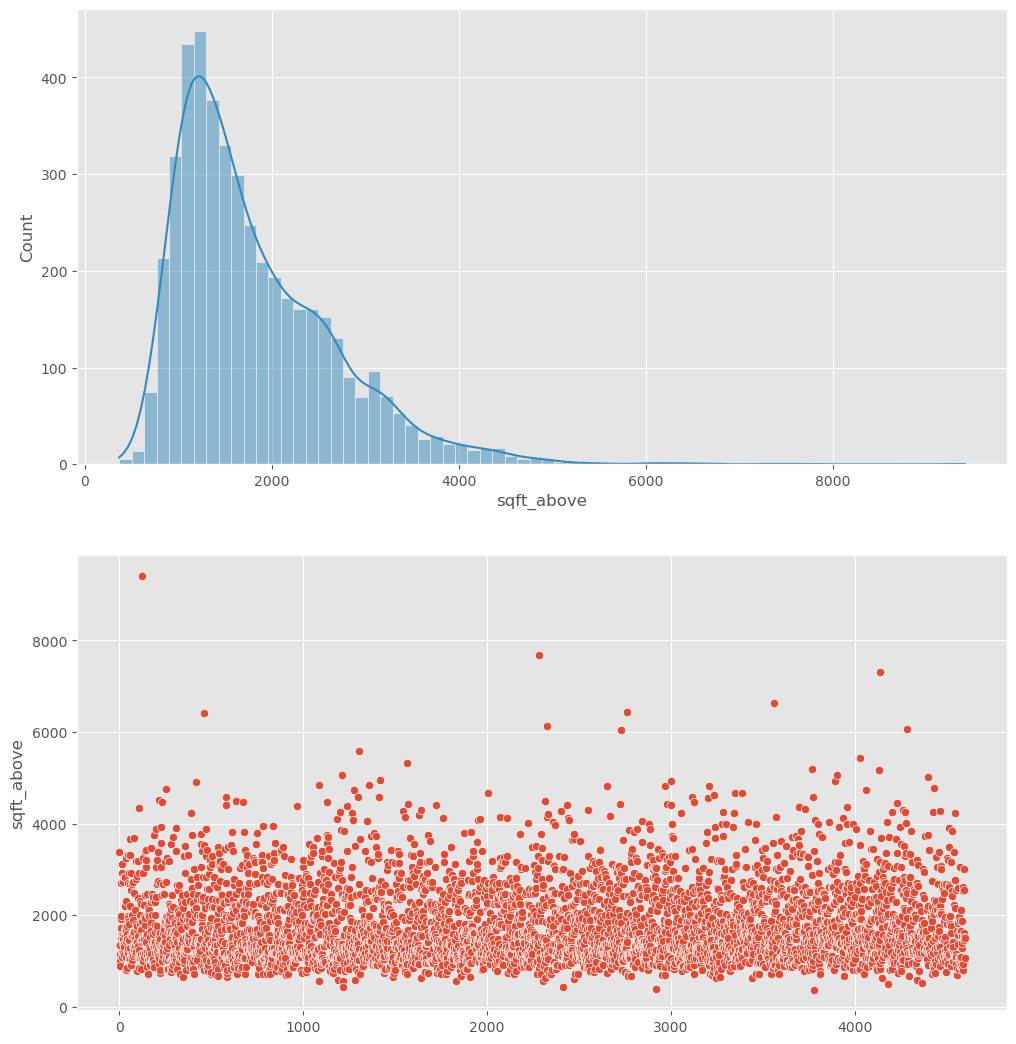

In [296]:
fig,axs = plt.subplots(2,1,figsize=(12,13))
plt.subplot(2,1,1)
sns.histplot(data=df,x="sqft_above",kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.style.use("ggplot")

plt.subplot(2,1,2)
sns.scatterplot(data=df,x=df.index,y="sqft_above")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

In [297]:
print("Before transformation skew : ",df["sqft_living"].skew())
df["sqft_living"] = np.log(df["sqft_living"])
print("After transformation skew : ",df["sqft_living"].skew())

Before transformation skew :  1.7188875411513491
After transformation skew :  -0.05370929015223324


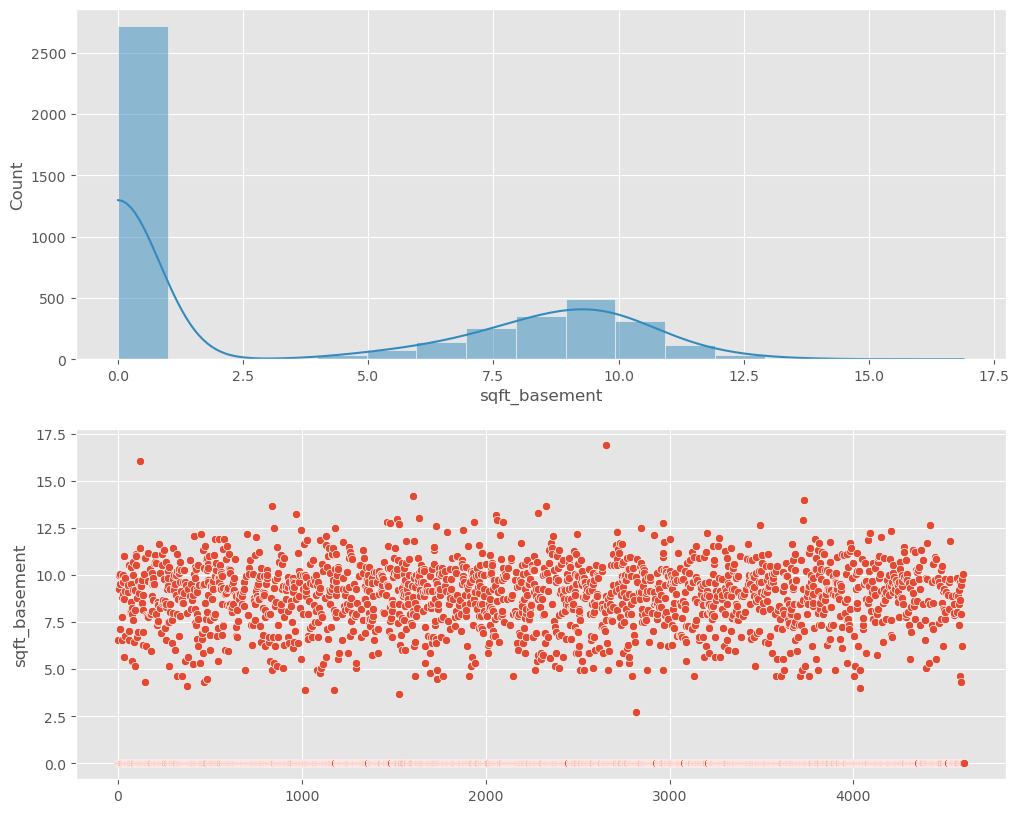

In [298]:
fig,axs = plt.subplots(2,1,figsize=(12,10))
plt.subplot(2,1,1)
sns.histplot(data=df,x="sqft_basement",kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.style.use("ggplot")

plt.subplot(2,1,2)
sns.scatterplot(data=df,x=df.index,y="sqft_basement")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

In [299]:
print("Before transformation skew : ",df["sqft_above"].skew())
df["sqft_above"] = np.log(df["sqft_above"])
print("After transformation skew : ",df["sqft_above"].skew())

Before transformation skew :  1.4539329178421054
After transformation skew :  0.23924533231027634


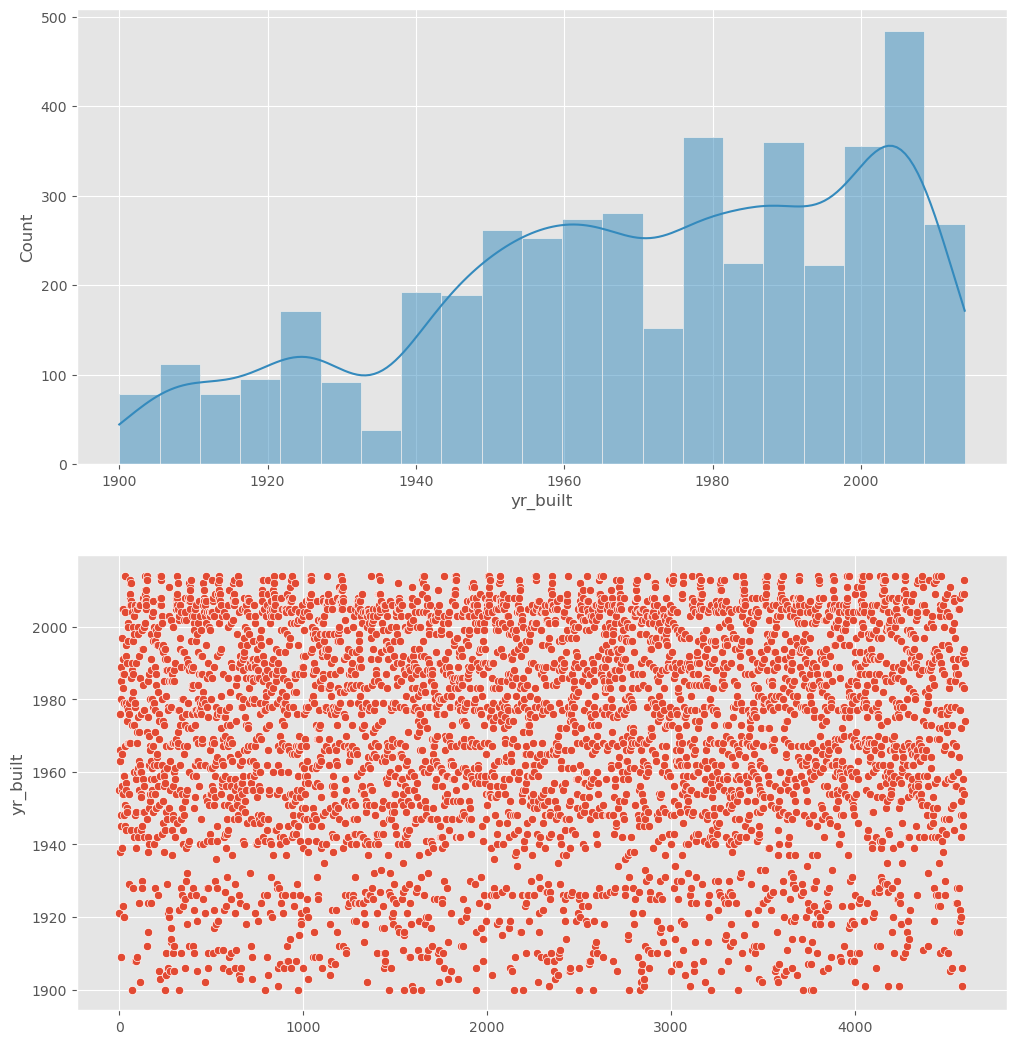

In [300]:
fig,axs = plt.subplots(2,1,figsize=(12,13))
plt.subplot(2,1,1)
sns.histplot(data=df,x="yr_built",kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.style.use("ggplot")

plt.subplot(2,1,2)
sns.scatterplot(data=df,x=df.index,y="yr_built")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

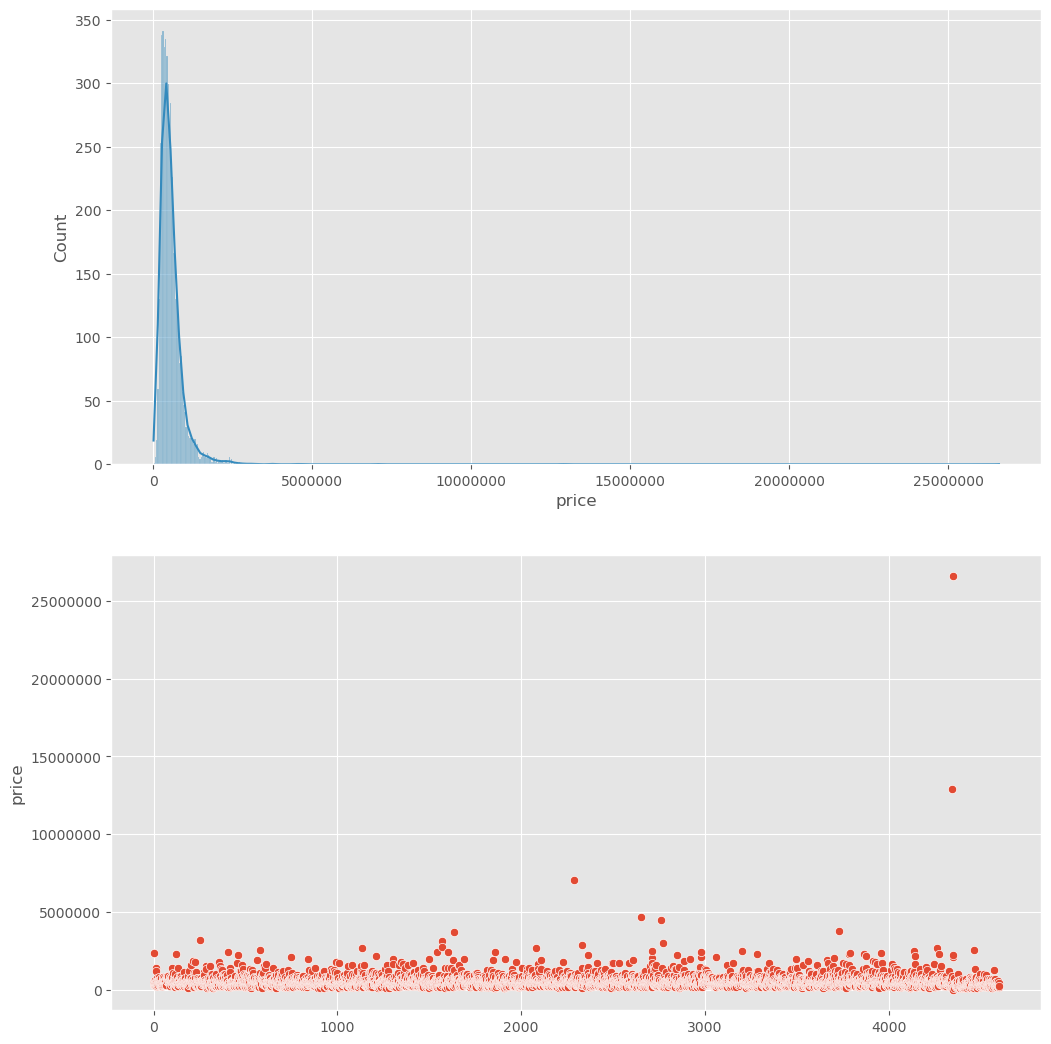

In [301]:
fig,axs = plt.subplots(2,1,figsize=(12,13))
plt.subplot(2,1,1)
sns.histplot(data=df,x="price",kde=True)
plt.ticklabel_format(style='plain', axis='x')
plt.style.use("ggplot")

plt.subplot(2,1,2)
sns.scatterplot(data=df,x=df.index,y="price")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

In [302]:
print("Before transformation skew : ",df["price"].skew())
df["price"] = np.log(df["price"])
print("After transformation skew : ",df["price"].skew())

Before transformation skew :  25.023817262008482
After transformation skew :  0.3299813838090415


Median value of house with respect to number of bedrooms : 
 bedrooms
0.0    13.990393
1.0    12.524526
2.0    12.821258
3.0    12.959844
4.0    13.262125
5.0    13.303017
6.0    13.415033
7.0    13.462471
8.0    13.615122
9.0    13.304683
Name: price, dtype: float64


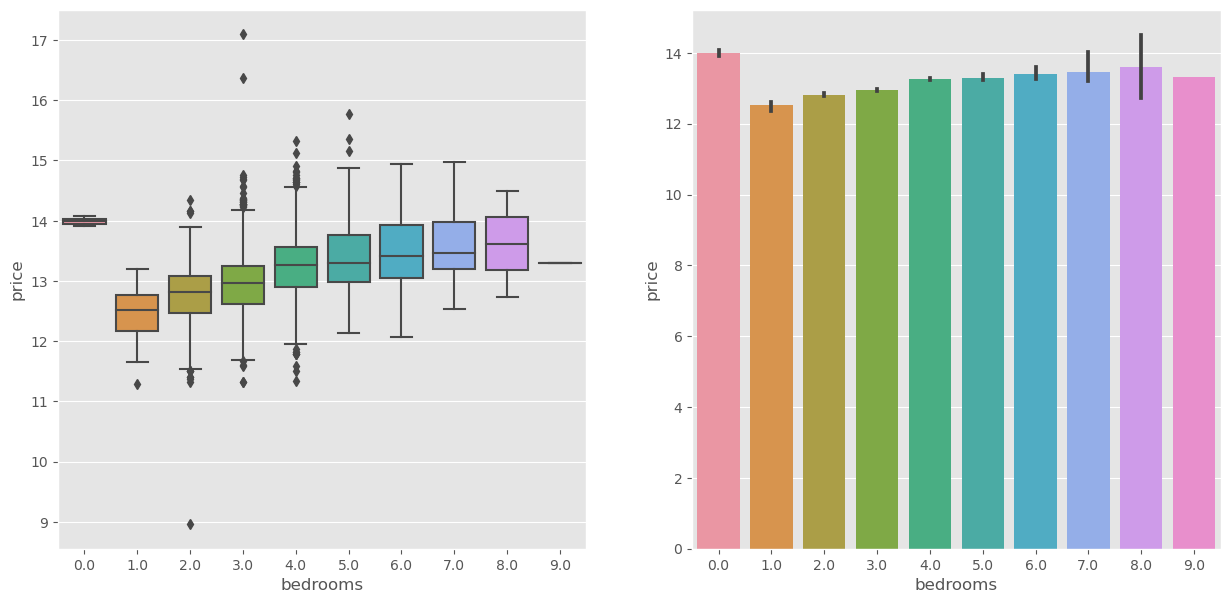

In [303]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="bedrooms")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of bedrooms : \n",df.groupby("bedrooms")["price"].median())

plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="bedrooms", estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Median value of house with respect to number of waterfront : 
 waterfront
0    13.047640
1    13.882885
Name: price, dtype: float64


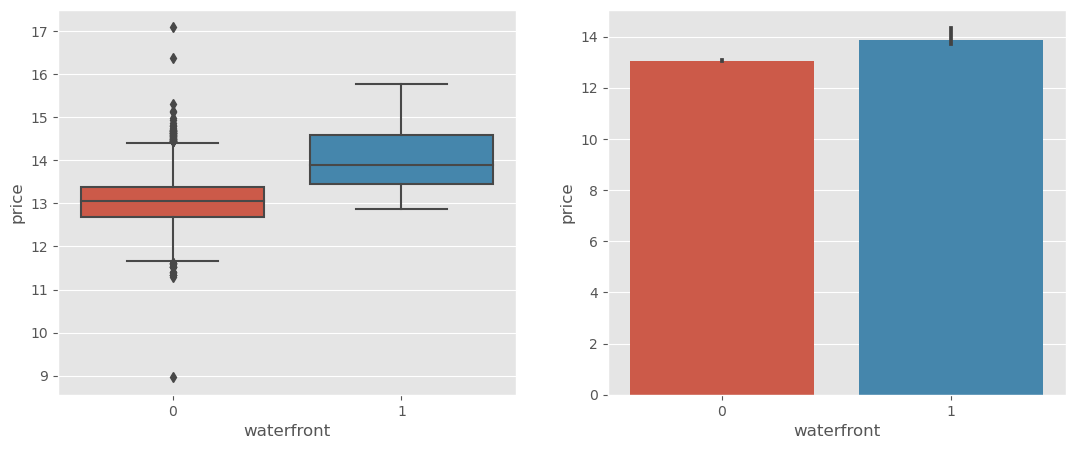

In [304]:
fig,axs = plt.subplots(1,2,figsize=(13,5))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="waterfront")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of waterfront : \n",df.groupby("waterfront")["price"].median())
plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="waterfront",estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Median value of house with respect to number of floors : 
 floors
1.0    12.886641
1.5    13.191889
2.0    13.230321
2.5    13.630987
3.0    13.081541
3.5    13.574094
Name: price, dtype: float64


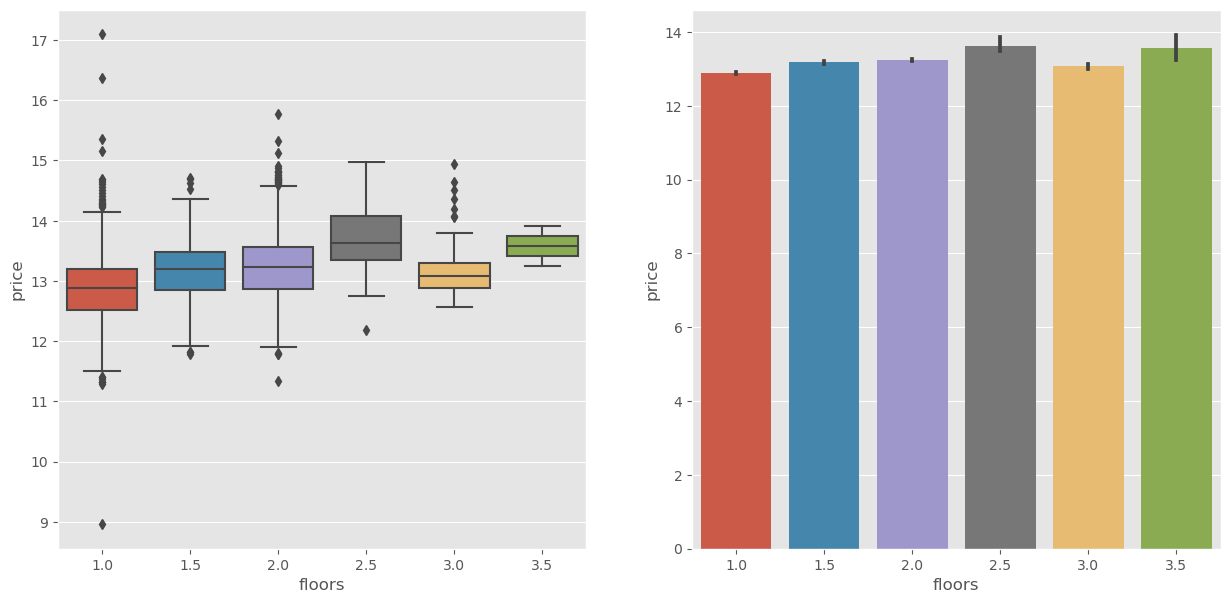

In [305]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="floors")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of floors : \n",df.groupby("floors")["price"].median())
plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="floors",estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

Median value of house with respect to number of view : 
 view
0    13.005830
1    13.485617
2    13.407467
3    13.710150
4    13.954403
Name: price, dtype: float64


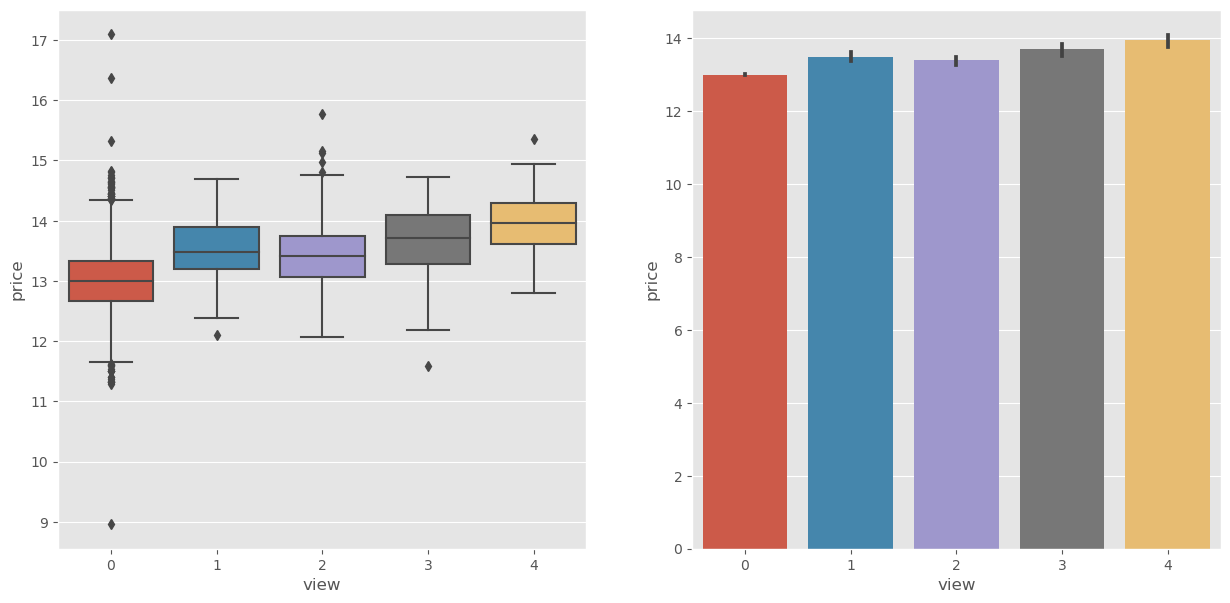

In [306]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="view")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of view : \n",df.groupby("view")["price"].median())

plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="view", estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')

plt.show()

Median value of house with respect to number of condition : 
 condition
1    12.628336
2    12.429216
3    13.051834
4    12.994530
5    13.232114
Name: price, dtype: float64


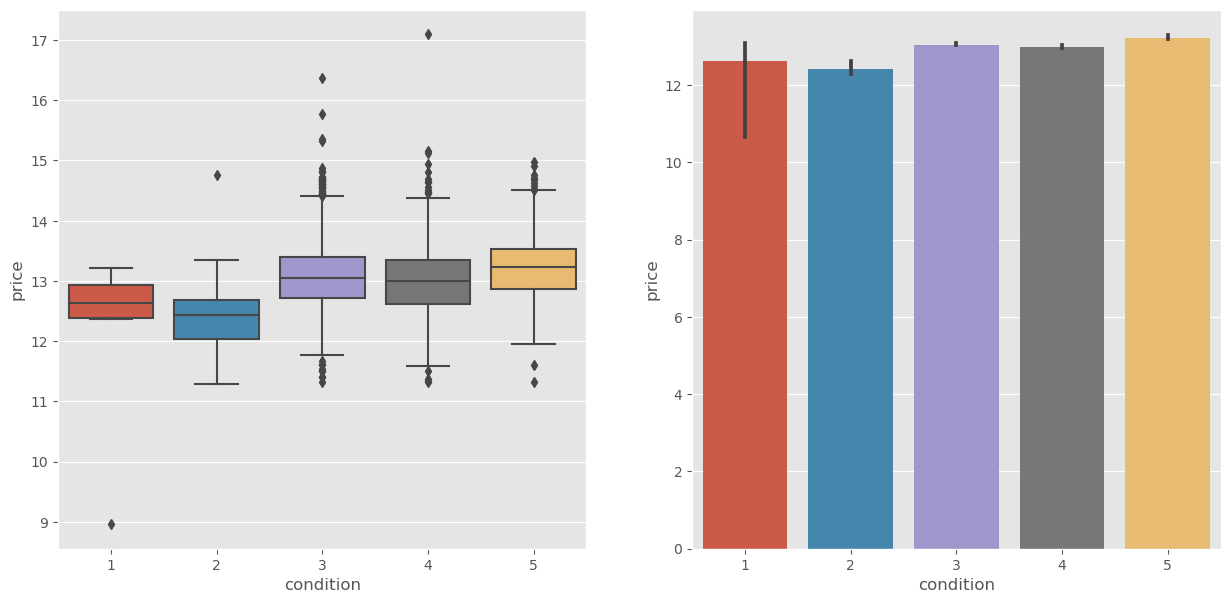

In [307]:
fig,axs = plt.subplots(1,2,figsize=(15,7))
plt.subplot(1,2,1)
sns.boxplot(data=df,y="price",x="condition")
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")

print("Median value of house with respect to number of condition : \n",df.groupby("condition")["price"].median())

plt.subplot(1,2,2)
sns.barplot(data=df,y="price",x="condition", estimator=np.median)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

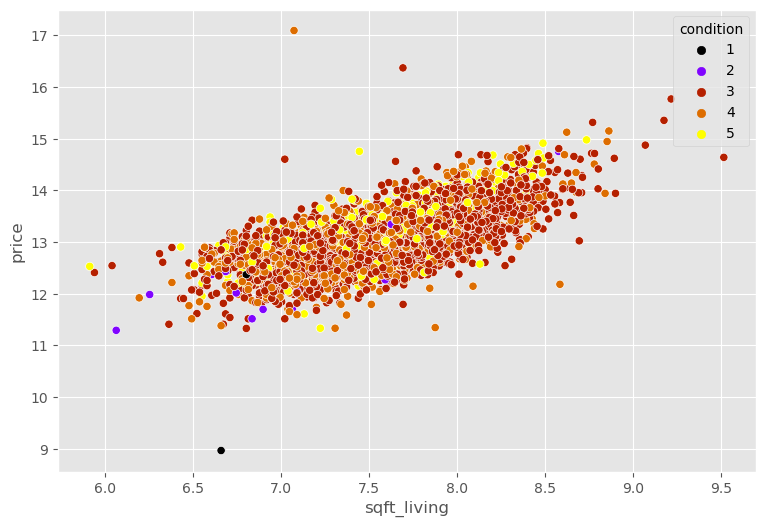

In [308]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=df,y="price",x="sqft_living",hue="condition",palette= 'gnuplot')
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

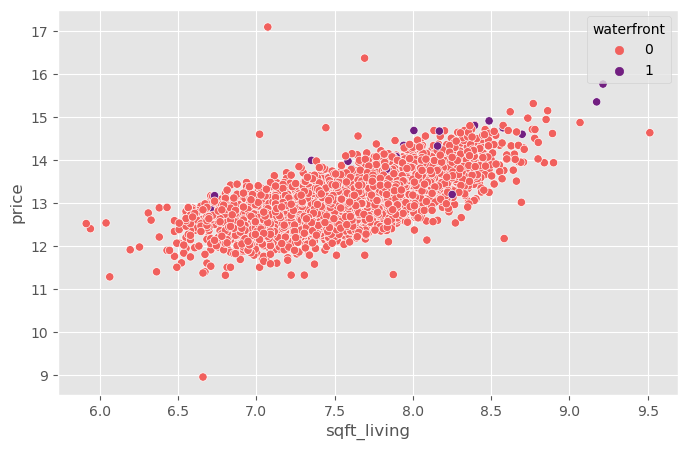

In [309]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df,y="price",x="sqft_living",hue="waterfront",palette= 'magma_r')
plt.ticklabel_format(style='plain', axis='y')
plt.style.use("ggplot")
plt.show()

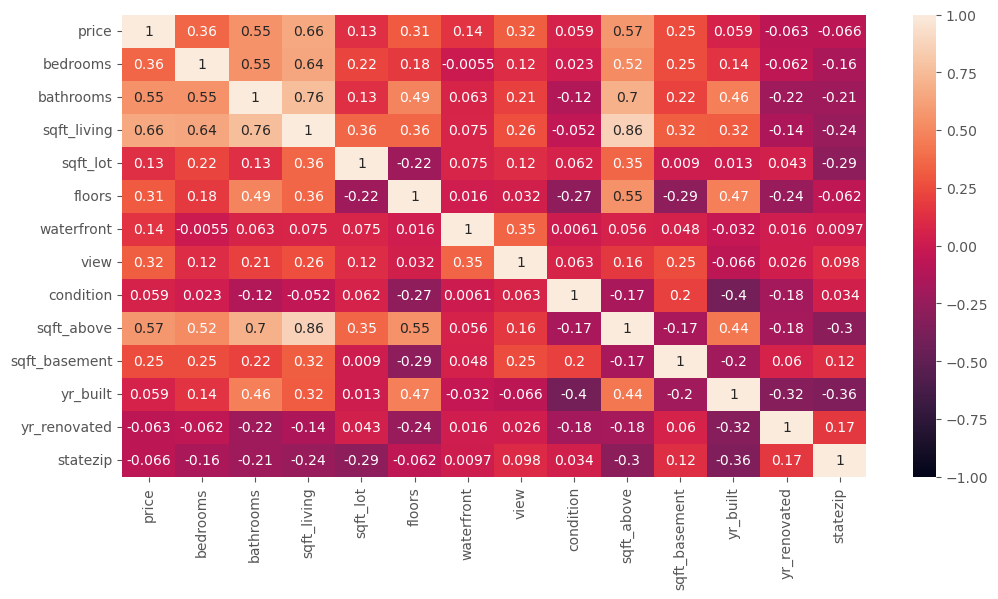

In [310]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True,vmax=1,vmin=-1)
plt.show()

In [311]:
del df["sqft_lot"]
del df["sqft_above"]
del df["yr_renovated"]

In [312]:
df.statezip.info()

<class 'pandas.core.series.Series'>
Int64Index: 4551 entries, 0 to 4599
Series name: statezip
Non-Null Count  Dtype
--------------  -----
4551 non-null   int32
dtypes: int32(1)
memory usage: 182.4 KB


In [313]:
X = df.drop("price",axis=1,inplace=False)
Y = df.loc[:,"price"]

In [314]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,Y,test_size=0.2,random_state=42)

In [315]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view',
       'condition', 'sqft_basement', 'yr_built', 'statezip'],
      dtype='object')

In [316]:
forest = RandomForestRegressor(random_state=42)
forest.fit(Xtrain,Ytrain)

RandomForestRegressor(random_state=42)

In [317]:
Ypred = forest.predict(Xtest)

In [318]:
print("mse : ",mean_squared_error(Ytest,Ypred))
print("rmse : ",np.sqrt(mean_squared_error(Ytest,Ypred)))
print("mae : ",mean_absolute_error(Ytest,Ypred))
print("train r2score : ",r2_score(Ytrain,forest.predict(Xtrain)))
print("test r2score : ",r2_score(Ytest,Ypred))

mse :  0.09348389544675541
rmse :  0.30575136213393295
mae :  0.2059310102733232
train r2score :  0.9584016922633154
test r2score :  0.6808608267443206


In [319]:
c={'n_estimators':[100,150,200,250,300,400],
   'max_depth':[9,11,13,15,17,19],
   'min_samples_split':[2,4,5,7,8],
    'min_samples_leaf':[3,4,5,7]}


In [320]:
e= RandomForestRegressor()
RS=RandomizedSearchCV(e,c,cv=10,random_state=42)
RS.fit(Xtrain,Ytrain)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [9, 11, 13, 15, 17, 19],
                                        'min_samples_leaf': [3, 4, 5, 7],
                                        'min_samples_split': [2, 4, 5, 7, 8],
                                        'n_estimators': [100, 150, 200, 250,
                                                         300, 400]},
                   random_state=42)

In [321]:
print(RS.best_params_)

{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': 15}


In [322]:
print(RS.best_score_)

0.6851892871141007


In [323]:
Ypred=RS.predict(Xtest)
print("mse : ",mean_squared_error(Ytest,Ypred))
print("rmse : ",np.sqrt(mean_squared_error(Ytest,Ypred)))
print("mae : ",mean_absolute_error(Ytest,Ypred))
print("test r2score : ",r2_score(Ytest,Ypred))

mse :  0.09309561197086014
rmse :  0.30511573537079356
mae :  0.21267845892968387
test r2score :  0.6821863648692978
